In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

Part a) Plot of the data points on a 2D plane is shown below




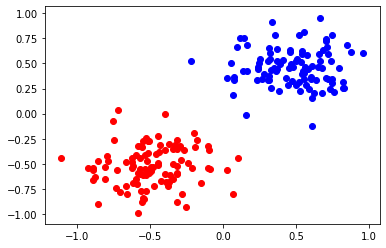

In [24]:
center = [[-0.5,-0.5],[0.5,0.5]]
X, y = make_blobs(n_samples=200,n_features=2, centers=center,random_state=None,cluster_std=0.20)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],marker = 'o', color='r', label='-1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],marker = 'o', color='b', label='1')
plt.show()

In [28]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def params(d):
    w = np.zeros(shape = (d, 1))
    b = 0
    return w,b

def cost(y, yhat):
    m = y.shape[1]
    cost = (-1 / m) * np.sum((y * np.log(yhat) + (1-y) * np.log(1 - yhat)))
    return cost

def propagate(w, b, X, y):
    m = X.shape[1]
    z = sigmoid(np.dot(w.T, X) + b) 
    cost = costFunction(y, z)
    dw = (1 / m) * np.dot(X, (z - y).T)
    db = (1 / m) * np.sum(z - y)
    cost = np.squeeze(cost)
    grads  = {'dw':dw, 'db':db}
    return  grads, cost

def gradientdescent(w, b, X, y,  epochs, alpha):
    costs = []
    for i in range(epochs):
        grads, cost = propagate(w, b, X, y)
        dw = grads['dw']
        db = grads['db']
        w = w - alpha/(i+1) * dw
        b = b - alpha/(i+1) * db

        costs.append(cost)
        if i%3 == 0:
            print("Itertation: {} cost: {}".format(i, cost))
        parameters = {'w': w, 'b': b}
        grads = {'db':db, 'dw':dw}
    return parameters, grads, costs

def SGD(w, b, X, y,  epochs, alpha, bs = 32):
    costs = []
    for i in range(epochs):
        cost1 = 0
        for j in range(0, X.shape[1], bs):
            miniX, miniY = X[:, j : j + bs], y[:, j : j + bs]
            grads, cost = propagate(w, b, miniX, miniY)
            dw = grads['dw']
            db = grads['db']
            w = w - alpha/(i+1) * dw
            b = b - alpha/(i+1) * db
            cost1 += cost
        costs.append(cost1/bs)
        if i%3 == 0:
            print("Itertation: {} cost: {}".format(i, cost1/miniX.shape[1]))
        parameters = {'w': w, 'b': b}
        grads = {'db':db, 'dw':dw}
    return parameters, grads, costs

def pred_values(w, X, b):
    pred_prob = sigmoid(np.dot(w.T, X) + b) #we compute the activation here
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 

def predict(X, w, b):
    z = (sigmoid(np.dot(w.T, trainX.T) + b)).T
    yhat = np.where(z > 0.5, 1, 0)
    return yhat

def calculateAccuracy(yhat, y):
    correctSamples = np.sum(yhat == y)
    accuracy = np.mean(yhat == y)
    return accuracy, correctSamples

def model(trainX, trainY, epochs = 200, alpha = 0.5, sgd = False):
    w, b = params(trainX.shape[0])
    if not sgd:
        parameters, grads, costs = gradientdescent(w, b, trainX, trainY, epochs, alpha)
    else:
        parameters, grads, costs = SGD(w, b, trainX, trainY, epochs, alpha)

    w = parameters['w']
    b = parameters['b']
    return w, b, costs


In [0]:
w, b, costsgd = model(trainX.T, trainY.T, sgd = True, epochs = 200)

Itertation: 0 cost: 0.48798354079641904
Itertation: 3 cost: 0.26543748718463933
Itertation: 6 cost: 0.2284893180978606
Itertation: 9 cost: 0.21048960210203554
Itertation: 12 cost: 0.19920285279438413
Itertation: 15 cost: 0.19121931659286392
Itertation: 18 cost: 0.1851559275940302
Itertation: 21 cost: 0.18032908191119268
Itertation: 24 cost: 0.1763560194812421
Itertation: 27 cost: 0.1730030523902207
Itertation: 30 cost: 0.17011810495480667
Itertation: 33 cost: 0.16759723236708898
Itertation: 36 cost: 0.16536656378693246
Itertation: 39 cost: 0.16337190943073152
Itertation: 42 cost: 0.16157245680030105
Itertation: 45 cost: 0.159936778330107
Itertation: 48 cost: 0.15844020956581176
Itertation: 51 cost: 0.15706307339662315
Itertation: 54 cost: 0.15578944487504742
Itertation: 57 cost: 0.15460627189383694
Itertation: 60 cost: 0.15350273629770209
Itertation: 63 cost: 0.15246978121877133
Itertation: 66 cost: 0.15149975569958285
Itertation: 69 cost: 0.1505861435990024
Itertation: 72 cost: 0.1497

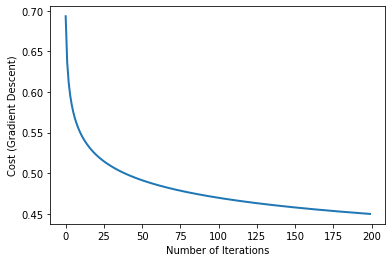

In [0]:
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (Gradient Descent)")
plt.plot(costgd,linewidth =3)

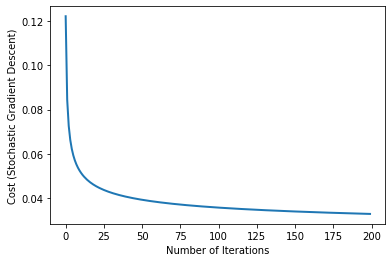

In [0]:
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (Stochastic Gradient Descent)")
plt.plot(costsgd,linewidth=3)